#Regression Model


In [ ]:
import tensorflow as tf
from tensorflow import keras     #used to built gan models,resnet models and RNN models  #keras comes on top of dofferent libraries like tf, pytorch,theano etc
from sklearn.model_selection import train_test_split      #data can also be splitted without using sklearn also

from tensorflow.keras.models import Sequential   #sequential is the backbone of NN which contains the layers
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout   #Dense works for only tabular data form and not for image,text or voice
from tensorflow.keras import optimizers

import pathlib #for processing a path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import pandas as pd                        #imported the datasets
df=pd.read_csv('/content/climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
df1=df.drop(["Year","Month"],axis=1)   #dropped the unwanted columns
df1.head()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
temp=df1['Temp'].values   #select the target 
temp

array([ 0.109,  0.118,  0.137,  0.176,  0.149,  0.093,  0.232,  0.078,
        0.089,  0.013,  0.049, -0.019,  0.065, -0.016, -0.024,  0.034,
        0.025, -0.035, -0.123, -0.282, -0.001, -0.155, -0.032, -0.042,
        0.001, -0.049, -0.042,  0.013, -0.035, -0.008, -0.093, -0.002,
        0.121,  0.065,  0.049,  0.045,  0.023,  0.055,  0.004, -0.001,
        0.016,  0.043, -0.033,  0.022,  0.116,  0.266,  0.021,  0.084,
        0.145,  0.121,  0.238,  0.219,  0.25 ,  0.174,  0.186,  0.314,
        0.334,  0.189,  0.248,  0.224,  0.175,  0.2  ,  0.168,  0.154,
        0.149,  0.12 ,  0.027,  0.106,  0.019,  0.094,  0.088,  0.083,
        0.073,  0.094,  0.167,  0.168,  0.135,  0.145,  0.067,  0.181,
        0.187,  0.242,  0.442,  0.285,  0.231,  0.233,  0.196,  0.227,
        0.179,  0.271,  0.278,  0.199,  0.224,  0.272,  0.161,  0.299,
        0.249,  0.269,  0.271,  0.225,  0.176,  0.133,  0.079,  0.084,
        0.266,  0.25 ,  0.199,  0.132,  0.125,  0.118, -0.008, -0.007,
      

In [ ]:

x = df1.iloc[:,0:8].values            #splitting the data into features
x

array([[ 2.5560000e+00,  3.4596000e+02,  1.6385900e+03, ...,
         3.5011300e+02,  1.3661024e+03,  8.6300000e-02],
       [ 2.1670000e+00,  3.4552000e+02,  1.6337100e+03, ...,
         3.5184800e+02,  1.3661208e+03,  7.9400000e-02],
       [ 1.7410000e+00,  3.4415000e+02,  1.6332200e+03, ...,
         3.5372500e+02,  1.3662850e+03,  7.3100000e-02],
       ...,
       [-7.8000000e-01,  3.8299000e+02,  1.8141800e+03, ...,
         5.3492700e+02,  1.3656759e+03,  4.6000000e-03],
       [-6.2100000e-01,  3.8413000e+02,  1.8123700e+03, ...,
         5.3490600e+02,  1.3657065e+03,  4.8000000e-03],
       [-6.6600000e-01,  3.8556000e+02,  1.8128800e+03, ...,
         5.3500500e+02,  1.3656926e+03,  4.6000000e-03]])

In [ ]:
y = df1.iloc[:,8].values         #splitting the data into target
y

array([ 0.109,  0.118,  0.137,  0.176,  0.149,  0.093,  0.232,  0.078,
        0.089,  0.013,  0.049, -0.019,  0.065, -0.016, -0.024,  0.034,
        0.025, -0.035, -0.123, -0.282, -0.001, -0.155, -0.032, -0.042,
        0.001, -0.049, -0.042,  0.013, -0.035, -0.008, -0.093, -0.002,
        0.121,  0.065,  0.049,  0.045,  0.023,  0.055,  0.004, -0.001,
        0.016,  0.043, -0.033,  0.022,  0.116,  0.266,  0.021,  0.084,
        0.145,  0.121,  0.238,  0.219,  0.25 ,  0.174,  0.186,  0.314,
        0.334,  0.189,  0.248,  0.224,  0.175,  0.2  ,  0.168,  0.154,
        0.149,  0.12 ,  0.027,  0.106,  0.019,  0.094,  0.088,  0.083,
        0.073,  0.094,  0.167,  0.168,  0.135,  0.145,  0.067,  0.181,
        0.187,  0.242,  0.442,  0.285,  0.231,  0.233,  0.196,  0.227,
        0.179,  0.271,  0.278,  0.199,  0.224,  0.272,  0.161,  0.299,
        0.249,  0.269,  0.271,  0.225,  0.176,  0.133,  0.079,  0.084,
        0.266,  0.25 ,  0.199,  0.132,  0.125,  0.118, -0.008, -0.007,
      

In [ ]:
from sklearn.model_selection import train_test_split            #splitting the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train

array([[-1.4020000e+00,  3.8573000e+02,  1.8034500e+03, ...,
         5.3648400e+02,  1.3657366e+03,  3.6000000e-03],
       [-4.9000000e-02,  3.8640000e+02,  1.8021100e+03, ...,
         5.3858600e+02,  1.3657228e+03,  4.5000000e-03],
       [-4.8800000e-01,  3.5589000e+02,  1.7249300e+03, ...,
         4.6396400e+02,  1.3667788e+03,  4.7000000e-03],
       ...,
       [ 1.9920000e+00,  3.5782000e+02,  1.7523900e+03, ...,
         5.0243600e+02,  1.3667462e+03,  1.4280000e-01],
       [-4.0700000e-01,  3.7829000e+02,  1.8036800e+03, ...,
         5.4175600e+02,  1.3657792e+03,  3.7000000e-03],
       [ 1.2020000e+00,  3.5379000e+02,  1.7502700e+03, ...,
         4.9796700e+02,  1.3666227e+03,  1.3800000e-01]])

In [ ]:
y_train

array([ 0.198,  0.466,  0.073,  0.034,  0.049,  0.435,  0.418,  0.269,
        0.019,  0.439,  0.055,  0.025,  0.314,  0.13 ,  0.456,  0.106,
       -0.007,  0.094, -0.002,  0.616,  0.159,  0.427,  0.013, -0.123,
        0.521,  0.249,  0.227,  0.218,  0.196,  0.452,  0.069,  0.061,
        0.364,  0.271,  0.407,  0.362,  0.526,  0.266,  0.452,  0.402,
       -0.072,  0.004,  0.419,  0.739,  0.229, -0.062,  0.486,  0.161,
        0.498,  0.482,  0.55 ,  0.409,  0.362,  0.137,  0.007,  0.282,
        0.342,  0.158,  0.491,  0.502,  0.111,  0.167, -0.008,  0.285,
        0.442,  0.132,  0.394,  0.247,  0.191,  0.44 ,  0.432,  0.12 ,
        0.213,  0.233,  0.593,  0.178,  0.065,  0.045, -0.035,  0.372,
        0.286,  0.38 ,  0.173,  0.57 ,  0.219,  0.299,  0.498,  0.52 ,
        0.413,  0.043,  0.271,  0.455,  0.156, -0.042,  0.315,  0.449,
        0.179,  0.109,  0.358,  0.425,  0.176,  0.248,  0.506,  0.084,
        0.406,  0.271,  0.023,  0.2  ,  0.266,  0.56 ,  0.289,  0.418,
      

In [ ]:
x_test

array([[ 1.8300000e-01,  3.8658000e+02,  1.7956500e+03,  3.2044500e+02,
         2.4722400e+02,  5.3813000e+02,  1.3656932e+03,  4.1000000e-03],
       [-5.6500000e-01,  3.4477000e+02,  1.6564800e+03,  3.0419400e+02,
         1.9775900e+02,  3.6429600e+02,  1.3656618e+03,  4.1600000e-02],
       [ 6.6500000e-01,  3.5168000e+02,  1.7011800e+03,  3.0669900e+02,
         2.4206400e+02,  4.4093700e+02,  1.3661079e+03,  8.8000000e-03],
       [ 8.5000000e-02,  3.5418000e+02,  1.7056900e+03,  3.0647200e+02,
         2.4604300e+02,  4.4472900e+02,  1.3663008e+03,  7.1000000e-03],
       [-8.6000000e-02,  3.4840000e+02,  1.6594000e+03,  3.0502700e+02,
         2.1251200e+02,  3.8164200e+02,  1.3656964e+03,  1.2600000e-02],
       [-1.3740000e+00,  3.5066000e+02,  1.6917700e+03,  3.0652200e+02,
         2.4818700e+02,  4.4900500e+02,  1.3661451e+03,  9.6000000e-03],
       [ 3.0900000e-01,  3.5487000e+02,  1.7348200e+03,  3.0940400e+02,
         2.6570900e+02,  4.8966400e+02,  1.3660527e+03,  6

In [ ]:
y_test

array([ 0.372,  0.013,  0.189,  0.175, -0.049,  0.154,  0.224,  0.4  ,
        0.499,  0.021,  0.168,  0.172,  0.266,  0.44 ,  0.601,  0.382,
        0.093,  0.097,  0.156,  0.254,  0.094,  0.266,  0.23 ,  0.261,
        0.135,  0.485, -0.072,  0.065,  0.38 ,  0.484,  0.125,  0.176,
        0.442,  0.381,  0.272,  0.133,  0.266, -0.035,  0.241,  0.121,
       -0.033,  0.001,  0.608,  0.457,  0.074,  0.274,  0.586,  0.078,
        0.435,  0.145, -0.097,  0.408,  0.283,  0.231,  0.579,  0.462,
        0.283,  0.223,  0.253,  0.159,  0.568,  0.177, -0.041,  0.118,
        0.519,  0.397,  0.334,  0.067,  0.305,  0.224,  0.202,  0.232,
        0.651, -0.093, -0.032,  0.493,  0.334,  0.21 ,  0.349,  0.309,
        0.442,  0.446,  0.176,  0.201,  0.278,  0.323,  0.027,  0.204,
        0.457,  0.501, -0.282,  0.276,  0.181])

In [ ]:
#Normalization using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Training a NN model for regression
model=Sequential()
model.add(Dense(8,input_dim=8,activation='tanh',kernel_initializer='glorot_normal',bias_initializer='zeros'))
model.add(Dense(16,activation='tanh',kernel_initializer='glorot_normal',bias_initializer='zeros'))
model.add(Dense(16,activation='tanh',kernel_initializer='glorot_normal',bias_initializer='zeros'))
model.add(Dense(1,kernel_initializer='glorot_normal',bias_initializer='zeros'))
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['mse'])


In [ ]:
xavier_weights=model.get_weights()   #getting the model weights using xaviers weight initialization

In [ ]:
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),verbose=1)#train the model for 200 epochs and validate the performnce wrt accuracy on the validation dataset

Epoch 1/200
7/7 [==============================] - 1s 31ms/step - loss: 0.1196 - mse: 0.1196 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0733 - mse: 0.0733 - val_loss: 0.0925 - val_mse: 0.0925
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0478 - val_mse: 0.0478
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0160 - mse: 0.0160 - va

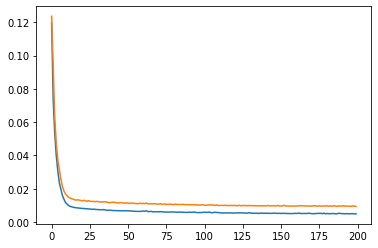

In [ ]:
plt.plot(history.history['loss'])   #visualization of loss and val_loss
plt.plot(history.history['val_loss'])

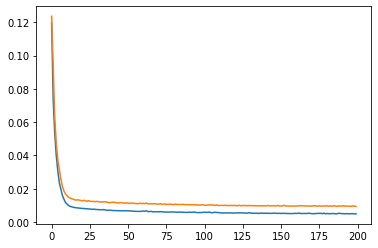

In [ ]:
plt.plot(history.history['mse'])   #visualization of mse and val_mse
plt.plot(history.history['val_mse'])

In [ ]:
import numpy as np
y_pred=model.predict(x_test)       #o/p will be in the form of probability     #predicting on the basis of x_test data
y_pred          

array([[ 0.42341018],
       [ 0.03182247],
       [ 0.21354473],
       [ 0.23448366],
       [-0.02328733],
       [ 0.1693362 ],
       [ 0.20916128],
       [ 0.36575654],
       [ 0.4206523 ],
       [ 0.12901232],
       [ 0.15027463],
       [ 0.23575333],
       [ 0.32491383],
       [ 0.3442995 ],
       [ 0.4850867 ],
       [ 0.37426108],
       [ 0.09498152],
       [ 0.1730735 ],
       [ 0.23073   ],
       [ 0.4332385 ],
       [ 0.20596386],
       [ 0.1677945 ],
       [ 0.24623132],
       [ 0.3926356 ],
       [ 0.19861268],
       [ 0.4737136 ],
       [ 0.01715526],
       [-0.00341699],
       [ 0.3653436 ],
       [ 0.40318766],
       [ 0.16334864],
       [ 0.11238196],
       [ 0.26835316],
       [ 0.440137  ],
       [ 0.20993501],
       [ 0.06716684],
       [ 0.08391032],
       [-0.01550564],
       [ 0.35186443],
       [ 0.13595405],
       [ 0.06636134],
       [-0.01772389],
       [ 0.5549145 ],
       [ 0.40739337],
       [ 0.33440402],
       [ 0

In [ ]:
import numpy as np
y_pred=model.predict(x_test)       #o/p will be in the form of probability
y_pred[0]           #so argmax gives the index where the max value exist in the array

array([0.42341018], dtype=float32)

In [ ]:
y_pred[0].max()

0.42341018

In [ ]:
import numpy as np
y_pred=model.predict(x_test)       #o/p will be in the form of probability
y_pred[1]

array([0.03182247], dtype=float32)

In [ ]:
y_pred[1].max()

0.031822473

#Classification Model


In [ ]:
import pandas as pd
df=pd.read_csv('/content/climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
df1=df.drop(["Year","Month"],axis=1)
df1.head()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
my_series=pd.cut(df1.Temp,bins=[-0.282,0.004,0.406,0.739],labels=['low','moderate','high'])   #labeling based on numeric data by giving the range
my_series

0      moderate
1      moderate
2      moderate
3      moderate
4      moderate
         ...   
303        high
304    moderate
305        high
306    moderate
307    moderate
Name: Temp, Length: 308, dtype: category
Categories (3, object): ['low' < 'moderate' < 'high']

In [ ]:
df=my_series.to_frame()   #series to dataframe
df

,Temp
0,moderate
1,moderate
2,moderate
3,moderate
4,moderate
...,...
303,high
304,moderate
305,high
306,moderate


In [ ]:
df1['Temp_Bucket']=my_series   #adding the column to the dataset
df1

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,Temp_Bucket
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109,moderate
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118,moderate
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137,moderate
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176,moderate
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149,moderate
...,...,...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407,high
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378,moderate
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440,high
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394,moderate


In [ ]:
temp=df1['Temp'].values
temp

array([ 0.109,  0.118,  0.137,  0.176,  0.149,  0.093,  0.232,  0.078,
        0.089,  0.013,  0.049, -0.019,  0.065, -0.016, -0.024,  0.034,
        0.025, -0.035, -0.123, -0.282, -0.001, -0.155, -0.032, -0.042,
        0.001, -0.049, -0.042,  0.013, -0.035, -0.008, -0.093, -0.002,
        0.121,  0.065,  0.049,  0.045,  0.023,  0.055,  0.004, -0.001,
        0.016,  0.043, -0.033,  0.022,  0.116,  0.266,  0.021,  0.084,
        0.145,  0.121,  0.238,  0.219,  0.25 ,  0.174,  0.186,  0.314,
        0.334,  0.189,  0.248,  0.224,  0.175,  0.2  ,  0.168,  0.154,
        0.149,  0.12 ,  0.027,  0.106,  0.019,  0.094,  0.088,  0.083,
        0.073,  0.094,  0.167,  0.168,  0.135,  0.145,  0.067,  0.181,
        0.187,  0.242,  0.442,  0.285,  0.231,  0.233,  0.196,  0.227,
        0.179,  0.271,  0.278,  0.199,  0.224,  0.272,  0.161,  0.299,
        0.249,  0.269,  0.271,  0.225,  0.176,  0.133,  0.079,  0.084,
        0.266,  0.25 ,  0.199,  0.132,  0.125,  0.118, -0.008, -0.007,
      

In [ ]:
temp_bucket=df1['Temp_Bucket'].values
temp_bucket

['moderate', 'moderate', 'moderate', 'moderate', 'moderate', ..., 'high', 'moderate', 'high', 'moderate', 'moderate']
Length: 308
Categories (3, object): ['low' < 'moderate' < 'high']

In [ ]:

x = df1.iloc[:,0:9].values
x

array([[ 2.5560000e+00,  3.4596000e+02,  1.6385900e+03, ...,
         1.3661024e+03,  8.6300000e-02,  1.0900000e-01],
       [ 2.1670000e+00,  3.4552000e+02,  1.6337100e+03, ...,
         1.3661208e+03,  7.9400000e-02,  1.1800000e-01],
       [ 1.7410000e+00,  3.4415000e+02,  1.6332200e+03, ...,
         1.3662850e+03,  7.3100000e-02,  1.3700000e-01],
       ...,
       [-7.8000000e-01,  3.8299000e+02,  1.8141800e+03, ...,
         1.3656759e+03,  4.6000000e-03,  4.4000000e-01],
       [-6.2100000e-01,  3.8413000e+02,  1.8123700e+03, ...,
         1.3657065e+03,  4.8000000e-03,  3.9400000e-01],
       [-6.6600000e-01,  3.8556000e+02,  1.8128800e+03, ...,
         1.3656926e+03,  4.6000000e-03,  3.3000000e-01]])

In [ ]:
df1

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp,Temp_Bucket
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109,moderate
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118,moderate
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137,moderate
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176,moderate
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149,moderate
...,...,...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407,high
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378,moderate
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440,high
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394,moderate


In [ ]:
y = df1.iloc[:,9].values
y

['moderate', 'moderate', 'moderate', 'moderate', 'moderate', ..., 'high', 'moderate', 'high', 'moderate', 'moderate']
Length: 308
Categories (3, object): ['low' < 'moderate' < 'high']

In [ ]:
y=df1['Temp_Bucket']

In [ ]:
y

0      moderate
1      moderate
2      moderate
3      moderate
4      moderate
         ...   
303        high
304    moderate
305        high
306    moderate
307    moderate
Name: Temp_Bucket, Length: 308, dtype: category
Categories (3, object): ['low' < 'moderate' < 'high']

In [ ]:
y.shape

(308,)

In [ ]:
#df1['Temp_Bucket']=df1.Temp_Bucket.map({'low':'1','moderate':'2','high':3})
#df1

In [ ]:
from sklearn.preprocessing import LabelEncoder     #importing LabelEncoder
labeled=LabelEncoder()

In [ ]:
df1['Temp_Bucket']=labeled.fit_transform(df1['Temp_Bucket'].astype(str))      #Converting the object datatype to numeric
df1['Temp_Bucket']

0      2
1      2
2      2
3      2
4      2
      ..
303    0
304    2
305    0
306    2
307    2
Name: Temp_Bucket, Length: 308, dtype: int64

In [ ]:
#df = df.apply(lambda 'Temp_Bucket': labeled.fit_transform('Temp_Bucket'3#))
#df

In [ ]:
#df2=pd.get_dummies(df1['Temp_Bucket'])
#df2

In [ ]:
df1['Temp_Bucket']    

0      2
1      2
2      2
3      2
4      2
      ..
303    0
304    2
305    0
306    2
307    2
Name: Temp_Bucket, Length: 308, dtype: int64

In [ ]:
y=df1["Temp_Bucket"]

In [ ]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Temp_Bucket, dtype: int64

In [ ]:
from sklearn.utils import shuffle         #shuffling the data
import random
#np.random(train)

In [ ]:
x,y=shuffle(x,y)

In [ ]:
df=df.sample(frac=1)
df

,Temp
148,moderate
240,high
215,high
254,moderate
209,moderate
...,...
237,high
268,high
67,moderate
132,moderate


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train

array([[-3.5800000e-01,  3.8605000e+02,  1.7818100e+03, ...,
         1.3657616e+03,  4.0000000e-03,  3.8200000e-01],
       [-6.0200000e-01,  3.4606000e+02,  1.6662100e+03, ...,
         1.3657085e+03,  1.6000000e-02, -1.5500000e-01],
       [ 1.7000000e-01,  3.7956000e+02,  1.7803500e+03, ...,
         1.3660179e+03,  2.2000000e-03,  3.5000000e-01],
       ...,
       [ 7.9300000e-01,  3.7892000e+02,  1.7760400e+03, ...,
         1.3658419e+03,  4.3000000e-03,  4.2500000e-01],
       [ 2.5180000e+00,  3.6244000e+02,  1.7839400e+03, ...,
         1.3658420e+03,  4.7000000e-03,  4.4900000e-01],
       [ 3.3000000e-01,  3.7787000e+02,  1.7984500e+03, ...,
         1.3660890e+03,  2.4000000e-03,  5.6000000e-01]])

In [ ]:
y_train

289    2
21     1
253    2
46     2
71     2
      ..
114    1
221    2
280    0
174    0
249    0
Name: Temp_Bucket, Length: 215, dtype: int64

In [ ]:
x_test

array([[-8.4900000e-01,  3.6435000e+02,  1.7873200e+03,  3.1389000e+02,
         2.6639500e+02,  5.3858300e+02,  1.3663395e+03,  2.2000000e-03,
         4.0900000e-01],
       [ 8.0800000e-01,  3.7066000e+02,  1.7809200e+03,  3.1701500e+02,
         2.5826900e+02,  5.4307800e+02,  1.3664584e+03,  2.2000000e-03,
         4.1300000e-01],
       [-1.5000000e-01,  3.7171000e+02,  1.7727100e+03,  3.1561100e+02,
         2.6241700e+02,  5.4165200e+02,  1.3664507e+03,  2.1000000e-03,
         2.5200000e-01],
       [ 1.8650000e+00,  3.5132000e+02,  1.6961800e+03,  3.0543300e+02,
         2.3209800e+02,  4.1754900e+02,  1.3656385e+03,  1.0400000e-02,
         8.4000000e-02],
       [ 1.0590000e+00,  3.7220000e+02,  1.8016700e+03,  3.1723400e+02,
         2.5828900e+02,  5.4364700e+02,  1.3664495e+03,  2.4000000e-03,
         3.9700000e-01],
       [ 3.6700000e-01,  3.6963000e+02,  1.7651600e+03,  3.1623300e+02,
         2.6040000e+02,  5.4213100e+02,  1.3664475e+03,  2.1000000e-03,
         4.

In [ ]:
y_test

185    0
232    0
205    2
47     2
234    2
      ..
267    0
283    0
29     1
113    1
69     2
Name: Temp_Bucket, Length: 93, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model=Sequential()  #Neural Network training
model.add(Dense(9,input_dim=9,activation='tanh',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(Dense(16,activation='tanh',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(Dense(16,activation='tanh',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(Dense(1,kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["accuracy"])



In [ ]:
xavier_weights=model.get_weights()

In [ ]:
model_history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),verbose=1)#train the model for 200 epochs and validate the performnce wrt accuracy on the validation dataset

Epoch 1/200
7/7 [==============================] - 1s 25ms/step - loss: 2.8427 - accuracy: 0.2512 - val_loss: 2.8064 - val_accuracy: 0.2151
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 2.5238 - accuracy: 0.2605 - val_loss: 2.5593 - val_accuracy: 0.2258
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2809 - accuracy: 0.2744 - val_loss: 2.3587 - val_accuracy: 0.2258
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 2.0599 - accuracy: 0.3116 - val_loss: 2.1687 - val_accuracy: 0.2473
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 1.8659 - accuracy: 0.3488 - val_loss: 1.9739 - val_accuracy: 0.2688
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 1.6725 - accuracy: 0.3535 - val_loss: 1.7770 - val_accuracy: 0.2903
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 1.4847 - accuracy: 0.3535 - val_loss: 1.5746 - val_accuracy: 0.2796
Epoch 8/200
7/7 [=========

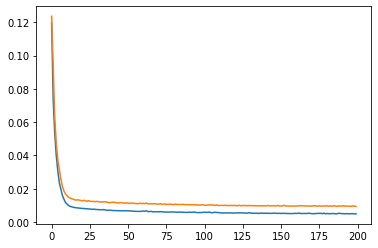

In [ ]:
plt.plot(history.history['loss'])   #visualization of loss and val_loss
plt.plot(history.history['val_loss'])

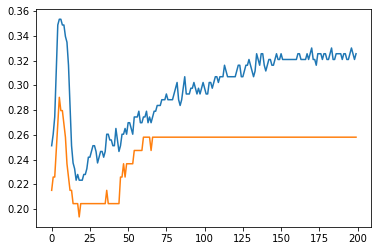

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [ ]:
import numpy as np
y_pred=model.predict(x_test)       #o/p will be in the form of probability     #predicting on the basis of x_test data
y_pred          

array([[ 1.2350436 ],
       [ 0.6275222 ],
       [ 2.0730298 ],
       [ 1.9002131 ],
       [ 0.62065834],
       [ 0.02557223],
       [ 1.9037535 ],
       [ 1.8758098 ],
       [ 2.0733485 ],
       [ 1.9400783 ],
       [ 2.26264   ],
       [ 1.9876615 ],
       [ 1.6285503 ],
       [ 1.6900457 ],
       [ 2.1141853 ],
       [ 1.4516687 ],
       [ 1.8987757 ],
       [ 1.2940458 ],
       [ 1.8717872 ],
       [ 1.6171492 ],
       [-0.19885473],
       [ 2.1929333 ],
       [ 1.9000365 ],
       [ 1.3562572 ],
       [ 2.2493405 ],
       [ 0.9126068 ],
       [ 2.2174456 ],
       [ 0.08317773],
       [ 2.0331748 ],
       [ 2.3305714 ],
       [-0.06354745],
       [ 1.8897276 ],
       [-0.2092656 ],
       [-0.10880901],
       [ 1.6985692 ],
       [ 2.1309175 ],
       [ 1.9838225 ],
       [ 1.7094206 ],
       [ 2.0202646 ],
       [ 1.8965069 ],
       [ 0.9074749 ],
       [ 1.9477602 ],
       [ 1.4950417 ],
       [ 1.3283621 ],
       [ 1.9548147 ],
       [ 0

In [ ]:
import numpy as np
y_pred=model.predict(x_test)       #o/p will be in the form of probability
y_pred[0]           #so argmax gives the index where the max value exist in the array

array([1.2350436], dtype=float32)

In [ ]:
y_pred[0].max()

1.2350436

In [ ]:
y_pred[0]

array([1.2350436], dtype=float32)

In [ ]:
import numpy as np
y_pred=model.predict(x_test)       #o/p will be in the form of probability
y_pred[1]

array([0.6275222], dtype=float32)

In [ ]:
y_pred[1].max()

0.6275222

In [ ]:
y_pred[1]

array([0.6275222], dtype=float32)

In [ ]:
y_pred

array([[ 1.2350436 ],
       [ 0.6275222 ],
       [ 2.0730298 ],
       [ 1.9002131 ],
       [ 0.62065834],
       [ 0.02557223],
       [ 1.9037535 ],
       [ 1.8758098 ],
       [ 2.0733485 ],
       [ 1.9400783 ],
       [ 2.26264   ],
       [ 1.9876615 ],
       [ 1.6285503 ],
       [ 1.6900457 ],
       [ 2.1141853 ],
       [ 1.4516687 ],
       [ 1.8987757 ],
       [ 1.2940458 ],
       [ 1.8717872 ],
       [ 1.6171492 ],
       [-0.19885473],
       [ 2.1929333 ],
       [ 1.9000365 ],
       [ 1.3562572 ],
       [ 2.2493405 ],
       [ 0.9126068 ],
       [ 2.2174456 ],
       [ 0.08317773],
       [ 2.0331748 ],
       [ 2.3305714 ],
       [-0.06354745],
       [ 1.8897276 ],
       [-0.2092656 ],
       [-0.10880901],
       [ 1.6985692 ],
       [ 2.1309175 ],
       [ 1.9838225 ],
       [ 1.7094206 ],
       [ 2.0202646 ],
       [ 1.8965069 ],
       [ 0.9074749 ],
       [ 1.9477602 ],
       [ 1.4950417 ],
       [ 1.3283621 ],
       [ 1.9548147 ],
       [ 0

In [ ]:
y_pred=np.array([[ 1.6361203 ],
       [ 0.12357935],
       [ 2.0631568 ],
       [ 2.0413518 ],
       [ 1.9073975 ],
       [ 1.938235  ],
       [-0.19379005],
       [ 1.5853615 ],
       [ 2.0548468 ],
       [ 0.10955355],
       [ 2.0147684 ],
       [ 0.30297905],
       [ 2.0740392 ],
       [ 1.8322196 ],
       [ 1.7683904 ],
       [ 1.8437428 ],
       [ 1.990679  ],
       [ 2.000172  ],
       [ 0.91141206],
       [ 1.9196286 ],
       [ 1.9149446 ],
       [ 0.7465871 ],
       [ 0.5965488 ],
       [ 1.5787551 ],
       [ 1.7771287 ],
       [ 2.042056  ],
       [ 2.0473864 ],
       [ 2.0167053 ],
       [ 1.8090088 ],
       [ 1.8647535 ],
       [ 0.2747562 ],
       [ 1.4744182 ],
       [ 0.4544589 ],
       [ 2.1887994 ],
       [ 2.0057585 ],
       [ 1.8264637 ],
       [ 0.6853685 ],
       [ 0.55380887],
       [ 2.0582032 ],
       [ 1.8733141 ],
       [ 1.6633067 ],
       [ 2.0549676 ],
       [ 1.7496827 ],
       [ 1.271069  ],
       [ 2.0313094 ],
       [ 1.9035494 ],
       [ 1.8903828 ],
       [ 2.03278   ],
       [-0.25756723],
       [ 2.2270284 ],
       [-0.06394573],
       [ 1.186892  ],
       [ 1.5528603 ],
       [ 0.4886549 ],
       [ 1.6308801 ],
       [ 1.9514582 ],
       [ 2.0307317 ],
       [ 1.7887223 ],
       [ 2.1547275 ],
       [ 1.4168606 ],
       [ 0.12424135],
       [ 2.0626986 ],
       [ 2.132917  ],
       [ 0.7752151 ],
       [ 2.0620623 ],
       [ 1.880111  ],
       [ 2.0938408 ],
       [ 1.588068  ],
       [ 2.0226297 ],
       [ 2.0276778 ],
       [ 2.0348272 ],
       [ 1.8389146 ],
       [ 1.9475827 ],
       [ 1.4358275 ],
       [ 1.3194783 ],
       [ 2.0962262 ],
       [ 1.8953438 ],
       [-0.07371742],
       [ 0.04718289],
       [ 1.5543435 ],
       [ 1.1623311 ],
       [ 0.9621765 ],
       [ 2.136332  ],
       [ 0.02499935],
       [ 2.0474813 ],
       [ 1.9071937 ],
       [ 0.76043767],
       [ 2.2323675 ],
       [ 0.94681877],
       [ 1.9974382 ],
       [ 2.0248432 ],
       [ 1.8919599 ],
       [ 1.8901119 ]])
y_pred=y_pred.astype(int)

In [ ]:
y_pred

array([[1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [0],
       [2],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
    

In [ ]:
y_test

185    0
232    0
205    2
47     2
234    2
      ..
267    0
283    0
29     1
113    1
69     2
Name: Temp_Bucket, Length: 93, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix              #calculating confusion matrix
confusion_matrix(y_pred,y_test)

array([[ 6,  0, 16,  0],
       [ 7,  3, 30,  1],
       [ 8,  3, 19,  0],
       [ 0,  0,  0,  0]])

In [ ]:
accuracy_score(y_pred,y_test)    #accuracy score calculation

0.3010752688172043

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_pred,y_test))                   #getting the classification report

              precision    recall  f1-score   support

           0       0.29      0.27      0.28        22
           1       0.50      0.07      0.13        41
           2       0.29      0.63      0.40        30
           3       0.00      0.00      0.00         0

    accuracy                           0.30        93
   macro avg       0.27      0.24      0.20        93
weighted avg       0.38      0.30      0.25        93



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Callback for using Early Stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(mode='min',verbose=1,patience=5)
model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0832 - accuracy: 0.3209 - val_loss: 0.2314 - val_accuracy: 0.2581
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0835 - accuracy: 0.3302 - val_loss: 0.2333 - val_accuracy: 0.2581
Epoch 3/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0825 - accuracy: 0.3302 - val_loss: 0.2336 - val_accuracy: 0.2581
Epoch 4/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.0826 - accuracy: 0.3302 - val_loss: 0.2325 - val_accuracy: 0.2581
Epoch 5/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.3209 - val_loss: 0.2298 - val_accuracy: 0.2581
Epoch 6/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.0824 - accuracy: 0.3256 - val_loss: 0.2330 - val_accuracy: 0.2581
Epoch 7/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.0813 - accuracy: 0.3302 - val_loss: 0.2317 - val_accuracy: 0.2581
Epoch 8/1000
7/7 [=

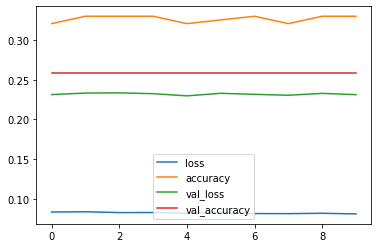

In [ ]:
import pandas as pd
loss =pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
from tensorflow import keras

from keras import layers
model =keras.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy','mse'])

In [ ]:
# Callback for using Early Stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(mode='min',verbose=1,patience=5)
model.fit(x_train,y_train,epochs=300,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/300
7/7 [==============================] - 1s 28ms/step - loss: 1.9050 - accuracy: 0.4465 - mse: 1.9050 - val_loss: 2.0872 - val_accuracy: 0.4624 - val_mse: 2.0872
Epoch 2/300
7/7 [==============================] - 0s 5ms/step - loss: 1.8992 - accuracy: 0.4372 - mse: 1.8992 - val_loss: 2.0818 - val_accuracy: 0.4731 - val_mse: 2.0818
Epoch 3/300
7/7 [==============================] - 0s 5ms/step - loss: 1.8952 - accuracy: 0.3907 - mse: 1.8952 - val_loss: 2.0782 - val_accuracy: 0.4194 - val_mse: 2.0782
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 1.8919 - accuracy: 0.3767 - mse: 1.8919 - val_loss: 2.0761 - val_accuracy: 0.3871 - val_mse: 2.0761
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 1.8902 - accuracy: 0.4047 - mse: 1.8902 - val_loss: 2.0750 - val_accuracy: 0.3226 - val_mse: 2.0750
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 1.8895 - accuracy: 0.3581 - mse: 1.8895 - val_loss: 2.0744 - val_accuracy

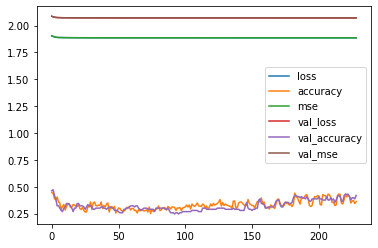

In [ ]:
import pandas as pd
loss =pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
import numpy as np
y_pred=model.predict(x_test)       #o/p will be in the form of probability     #predicting on the basis of x_test data
y_pred          

array([[0.33347195, 0.3330578 , 0.3334702 ],
       [0.33347195, 0.3330578 , 0.3334702 ],
       [0.3331353 , 0.33329672, 0.33356798],
       [0.33568457, 0.3287616 , 0.33555377],
       [0.33119905, 0.33048323, 0.33831775],
       [0.329382  , 0.33690098, 0.33371705],
       [0.33266065, 0.3339889 , 0.3333505 ],
       [0.33327255, 0.3332865 , 0.33344093],
       [0.3328353 , 0.332858  , 0.3343067 ],
       [0.33347195, 0.3330578 , 0.3334702 ],
       [0.33383393, 0.3236547 , 0.34251136],
       [0.3334403 , 0.33304915, 0.33351055],
       [0.336945  , 0.32679293, 0.3362621 ],
       [0.3346563 , 0.3349123 , 0.3304314 ],
       [0.33347195, 0.3330578 , 0.3334702 ],
       [0.33299085, 0.33357978, 0.33342934],
       [0.33347195, 0.3330578 , 0.3334702 ],
       [0.3347674 , 0.33355305, 0.33167964],
       [0.33249614, 0.33555233, 0.33195156],
       [0.33326405, 0.3334046 , 0.33333132],
       [0.33310905, 0.3340505 , 0.33284047],
       [0.33177078, 0.32934245, 0.33888677],
       [0.

#Linear Regression


In [ ]:
import pandas as pd
df=pd.read_csv('/content/climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
df=df.drop(['Year','Month'],axis=1)
df

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
y=df['Temp']
y

0      0.109
1      0.118
2      0.137
3      0.176
4      0.149
       ...  
303    0.407
304    0.378
305    0.440
306    0.394
307    0.330
Name: Temp, Length: 308, dtype: float64

In [ ]:
x=df.drop(['Temp'],axis=1)
x

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression          #training linear regression model
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(x_test_scaled,y_test)   #calculating the accuracy

0.6783967006425045

In [ ]:
y_pred=model.predict(x_test)   #predicting the model

In [ ]:
y_pred

array([159.41363449, 126.0717329 , 137.36963629, 137.82729379,
       127.97250973, 137.91687208, 145.04300582, 155.69277379,
       158.73228987, 133.49260436, 141.36540963, 154.29010476,
       159.24103162, 159.22728772, 159.44548287, 158.98586618,
       125.34508188, 153.23195356, 154.29697315, 154.76292956,
       141.06841719, 147.26625228, 151.43411475, 157.21833088,
       141.88897724, 155.38292087, 148.32558596, 130.36879182,
       159.26148387, 159.50587887, 148.18408685, 124.35396982,
       143.2719888 , 159.29347856, 145.12678948, 146.62011498,
       133.09632113, 126.76520896, 156.90414649, 149.04656528,
       132.15275101, 127.7533062 , 155.88187387, 158.65267534,
       159.39944344, 156.68694371, 158.34847622, 125.70388549,
       159.50074267, 142.18933812, 148.66578486, 158.99092012,
       152.35948567, 143.69362632, 155.96832313, 158.11247923,
       159.16371095, 157.05787684, 156.37202626, 157.81080858,
       158.28300748, 153.20188281, 150.09926397, 148.25

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(LinearRegression(),x,y,cv=5)
cv_scores

array([-4.57928382, -1.15986088,  0.56242047, -0.60616631,  0.12158302])

In [ ]:
import numpy as np
np.mean(cv_scores)

-1.1322615036635089

#Decision Tree


In [ ]:
import pandas as pd
df=pd.read_csv('/content/climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
df=df.drop(['Year','Month'],axis=1)
df

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
y=df['Temp']
y

0      0.109
1      0.118
2      0.137
3      0.176
4      0.149
       ...  
303    0.407
304    0.378
305    0.440
306    0.394
307    0.330
Name: Temp, Length: 308, dtype: float64

In [ ]:
x=df.drop(['Temp'],axis=1)
x

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model=DecisionTreeRegressor(min_samples_split=10)          #using the decision tree regressor algorithm   #by default its 1 but we set it to 10 #increasing the number of samples
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
model.score(x_test,y_test)   #calculating the accuracy

0.7512674920810656

In [ ]:
model.score(x_train,y_train)

0.945634428339736

#Random Forest Regressor


In [ ]:
import pandas as pd
df=pd.read_csv('/content/climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
df=df.drop(['Year','Month'],axis=1)
df

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
y=df['Temp']
y

0      0.109
1      0.118
2      0.137
3      0.176
4      0.149
       ...  
303    0.407
304    0.378
305    0.440
306    0.394
307    0.330
Name: Temp, Length: 308, dtype: float64

In [ ]:
x=df.drop(['Temp'],axis=1)
x

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619
...,...,...,...,...,...,...,...,...
303,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036
304,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043
305,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046
306,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler        #Normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor   #training the Random Forest Regressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.score(x_test,y_test)   #calculating the accuracy

0.816862035192489

In [ ]:
model.score(x_train,y_train)

0.9748320036608781

In [ ]:
from sklearn.preprocessing import StandardScaler       #Importing StandardScaler 

In [ ]:
scaler=StandardScaler()

In [ ]:
x=scaler.fit_transform(x)                                 #Fitting on the data

In [ ]:
from sklearn.cluster import KMeans                      #Importing Kmeans

In [ ]:
number_of_K=[1,2,3,4,5]                              #Assigning the no of clusters

In [ ]:
inertias=[]        
for i in number_of_K:
    model=KMeans(n_clusters=i)
    model.fit(x)                            #Fitting on the model
    inertias.append(model.inertia_)

In [ ]:
number_of_K

[1, 2, 3, 4, 5]

In [ ]:
inertias                                       #Calculating the inertias

[2464.0,
 1463.2071674483332,
 1048.1083955707704,
 835.0401657778211,
 663.4310100366358]

In [ ]:
import matplotlib.pyplot as plt                   #Importing matplotlib library

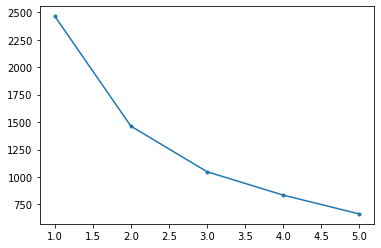

In [ ]:
plt.plot(number_of_K,inertias,marker=".")
plt.show()                                         #Plotting of the elbow plot

# CONCLUSION:Number of cluster should be 2 according to the elbow plot


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


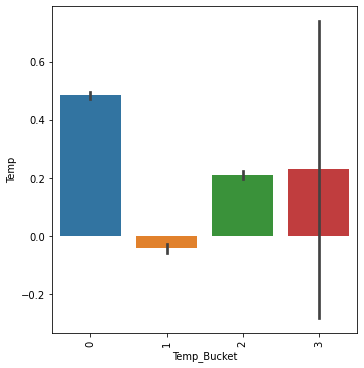

In [ ]:
fig = plt.figure(figsize=(12,6)) 
ax1 = fig.add_subplot(122)
sns.barplot(df1.Temp_Bucket,df1.Temp)
plt.xticks(rotation=90)
plt.show()